In [11]:
from langgraph.graph import START,END,StateGraph
from langchain_groq import ChatGroq
from dotenv import load_dotenv 
from typing import TypedDict,Annotated
import operator
from pydantic import BaseModel,Field
from langchain_core.messages import  HumanMessage,AIMessage,BaseMessage
load_dotenv()
model=ChatGroq(model="openai/gpt-oss-120b")


In [12]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [13]:
def chat_llm(state:ChatState):
    message=state["messages"]
    response=model.invoke(message)
    return {"messages":[response]}

In [14]:
graph=StateGraph(ChatState)
graph.add_node("chat_llm",chat_llm)
graph.add_edge(START, 'chat_llm')
graph.add_edge('chat_llm', END)

chatbot = graph.compile()

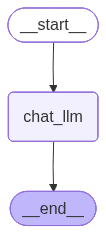

In [16]:
chatbot

In [17]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of nepal')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of Nepal is **Kathmandu**.'